In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/z001f64/python3env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [3]:
DATA_FILE = 'data/birth_life_2010.txt'

In [6]:
# Step 1: read in the data
data, n_samples = read_birth_life_data(DATA_FILE)

In [7]:
# Step 2: create Dataset and iterator
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

In [8]:
iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

In [9]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

In [10]:
# Step 4: build model to predict Y
Y_predicted = X * w + b

In [11]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

In [12]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

#### Run Gradient Descent to Solve for Minima

In [14]:
start = time.time()
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iterator.initializer) # initialize the iterator
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss]) 
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
            
        if i%5==0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 
    print('w: %f, b: %f' %(w_out, b_out))
print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 5: 594.1417484349327
Epoch 10: 335.55436177954664
Epoch 15: 195.25972397061292
Epoch 20: 119.20935661137888
Epoch 25: 78.03213362396008
Epoch 30: 55.77163058824279
Epoch 35: 43.763794843404014
Epoch 40: 37.305592010505066
Epoch 45: 33.846705867195695
Epoch 50: 32.004961317298495
Epoch 55: 31.03225782010038
Epoch 60: 30.524589418089263
Epoch 65: 30.264247165074092
Epoch 70: 30.134226098457216
Epoch 75: 30.072084357345624
Epoch 80: 30.04458791257593
Epoch 85: 30.034287342776263
Epoch 90: 30.03209388247043
Epoch 95: 30.03343712379727
w: -6.070214, b: 84.929512
Took: 3.988824 seconds


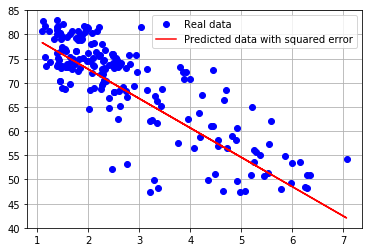

In [16]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data with squared error')
plt.grid()
plt.legend()
plt.show()